In [2]:
import import_ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [2]:
!pip install yfinance

In [3]:
data

NameError: name 'data' is not defined

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

In [14]:
ma_100_days = data.Close.rolling(100).mean()

In [16]:
ma_100_days

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2756    103.6147
2757    103.4723
2758    103.2449
2759    102.9905
2760    102.7204
Name: Close, Length: 2761, dtype: float64

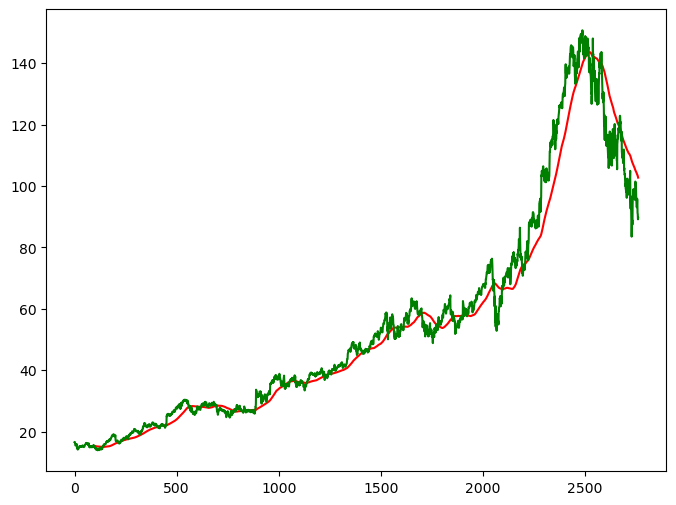

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')

In [20]:
ma_200_days = data.Close.rolling(200).mean()

In [22]:
ma_200_days

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2756    112.411963
2757    112.194205
2758    111.976965
2759    111.762105
2760    111.577933
Name: Close, Length: 2761, dtype: float64

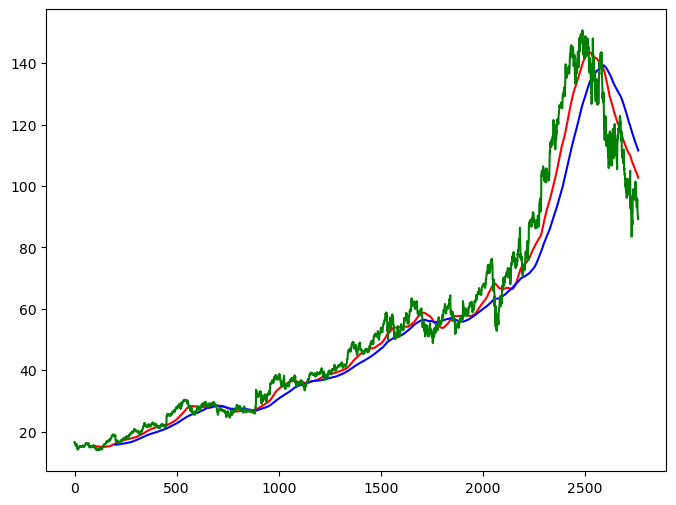

In [24]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')

In [26]:
data.dropna(inplace=True)

In [28]:
data_train=pd.DataFrame(data.Close[0 : int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [30]:
data_train.shape[0]

2208

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [34]:
data_train_scale = scaler.fit_transform(data_train)

In [36]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [38]:
x, y = np.array(x), np.array(y)

In [40]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [87]:
!pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 220.2 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 274.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.1/1.1 MB 1.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.1 MB 2.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.1 MB 3.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.1 MB 3.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.7/1.1 MB 2.7 MB/s eta 0:00:01
   -------------------------- ------------- 0.7/1.1 MB 2.6 MB/s eta 0:00:01
   --------------------------

In [41]:
from keras import models
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [44]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

C:\Users\jkuruba\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [109]:
!pip install tensorflow

In [46]:
import tensorflow as tf

In [48]:
import keras

In [50]:
keras.__version__

'3.4.1'

In [9]:
pip3 show keras

SyntaxError: invalid syntax (2364869574.py, line 1)

In [52]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [54]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - loss: 0.0751
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0060
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - loss: 0.0063
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0051
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0050
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0051
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0045
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0049
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0043
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0042
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0041
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - loss: 0.0038
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0036
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0030
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 251ms/ste

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [58]:
pass_100_data = data_train.tail(100)

In [60]:
data_test= pd.concat([pass_100_data, data_test], ignore_index=True)

In [62]:
data_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [64]:
data_test_scale = scaler.fit_transform(data_test)

In [66]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [68]:
x, y = np.array(x), np.array(y)

In [70]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


In [1]:
y_predict

NameError: name 'y_predict' is not defined

In [74]:
scale = 1/scaler.scale_

In [76]:
scale

array([82.71399689])

In [78]:
y_predict = y_predict*scale

In [80]:
y = y*scale

In [78]:
y_predict

array([[0.05434426],
       [0.05271222],
       [0.05139763],
       [0.05047223],
       [0.04994879],
       [0.04980475],
       [0.05000524],
       [0.05048312],
       [0.05121584],
       [0.05220914],
       [0.05348522],
       [0.05501067],
       [0.0567315 ],
       [0.05850987],
       [0.06026795],
       [0.06200989],
       [0.06375742],
       [0.06554576],
       [0.06748375],
       [0.06969042],
       [0.07221855],
       [0.07508334],
       [0.07824787],
       [0.08165304],
       [0.08522852],
       [0.08892566],
       [0.0927073 ],
       [0.09653374],
       [0.10034094],
       [0.10409107],
       [0.10773726],
       [0.11122835],
       [0.11454664],
       [0.11771354],
       [0.12074021],
       [0.12362222],
       [0.12636363],
       [0.12898923],
       [0.13152668],
       [0.13399696],
       [0.13640896],
       [0.1387626 ],
       [0.14103736],
       [0.14320055],
       [0.14522564],
       [0.14708451],
       [0.14875668],
       [0.150

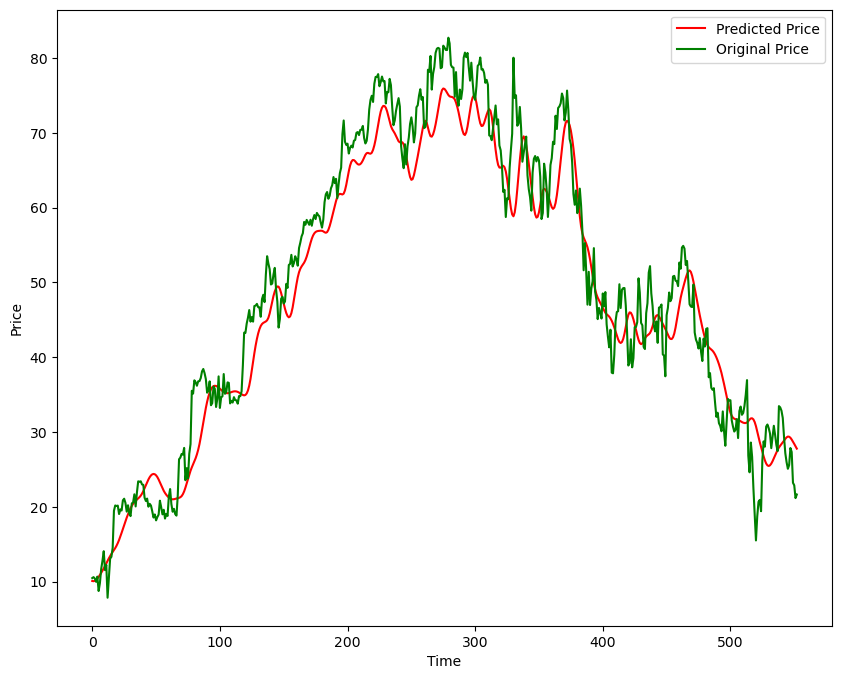

In [82]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [84]:
model.save('Stock Prediction Model.keras')